# HW5 due 11:30a Mon Nov 14

# 2. Asteroids equilibria, linearization, and simulation

a. Determine an equilibrium for the asteroids ship control system, that is, find $(x_0,u_0)\in\mathbb{R}^n\times\mathbb{R}^m$ such that $f(x_0,u_0) = 0$ using $f$ from the solution to HW1.  (There may be more than one equilibrium; pick one of them.)

We have an equilibrium at 
$$v_1 = v_2 = 0$$
and
$$u_1 = u_2 = 0$$
For this, $x_1, x_2$ and $\theta$ can be arbitrary. Let's choose $x_1 = 2, x_2 = 3, \theta = \frac{\pi}{2}$

Our equilibrium is thus

$$x_0 = \begin{bmatrix}
 2\\3\\0\\0\\\frac{\pi}{2}
\end{bmatrix},~~~u_0 = \begin{bmatrix}
 0\\0\\
\end{bmatrix}$$

b. Explain the physical interpretation of the equilibrium behavior.

The physical interpretation of the equilibirum is the state of the ship when it is not moving. The ship can be located and oriented arbitrarily, but is not in motion.

c. Linearize the asteroids ship control system at the equilibrium from (a.), that is, compute the matrices $Df(x_0,u_0)$ and $Dh(x_0,u_0)$.  (It's preferable if you can do this symbolically; if you are unable to, explain why and compute it numerically.)

Differentiating, we have

$$Df(x,u) = \begin{bmatrix}
0&0&1&0&0\\
0&0&0&1&0\\
0&0&-k&0&-u_1\sin{\theta}\\
0&0&0&-k&u_1\cos{\theta}\\
0&0&0&0&0\\
\end{bmatrix}, Dh(x,u) = \begin{bmatrix}
1&0&0&0&0\\
0&1&0&0&0\\
0&0&0&0&1\\
\end{bmatrix}$$

Evaluating at $x_0, u_0$ yields:

$$Df(x_0,u_0) = \begin{bmatrix}
0&0&1&0&0\\
0&0&0&1&0\\
0&0&-k&0&0\\
0&0&0&-k&0\\
0&0&0&0&0\\
\end{bmatrix}, Dh(x_0,u_0) = \begin{bmatrix}
1&0&0&0&0\\
0&1&0&0&0\\
0&0&0&0&1\\
\end{bmatrix}$$

d. Simulate the asteroids ship control system both at and nearby the equilibrium from (a.) for an "interesting" amount of time, and plot $\ge 2$ "interesting" state variables or outputs from these trajectories.  


In [21]:
%run _547
%matplotlib inline

Let's setup the simulation parameters.

In [26]:
k = 0.1 #arbitrarily selected drag

#some initial conditions
x_01 = np.array([[2], [3], [0], [0], [np.pi/2]])
x_02 = np.array([[2], [3], [-1] ,[2], [np.pi/2]]) 

# simulation run time
t = 30

def f(t, x, u):
    A = np.array([[0,0,1,0,0], [0,0,0,1,0], [0,0,-k,0,0], [0,0,0,-k,0], [0,0,0,0,0]])
    B = np.array([[0,0], [0,0], [0,0], [0,0], [0,0]])
    return np.dot(A,x)
def h(x):
    C = np.array([[1,0,0,0,0][0,1,0,0,0][0,0,0,0,1]])
    return np.dot(C,x)

And now define the simulation algorithm

In [ ]:
def sim(f,t,x,u=0,dt=1e-4):
    j,t_,x_ = 0,[0],[x]
    while j*dt < t:
        t_.append((j+1)*dt)
        x_.append(x_[-1] + dt*f(j*dt,x_[-1],u))
        j += 1
    return np.array(t_),np.array(x_)

Let's run it for our first initial condition, at the equilibrium. 

In [33]:
x = x_01
t_,x_ = sim(f,t,x, dt =1e-4)

And plot the results.

(300001, 5, 1)
(300001,)


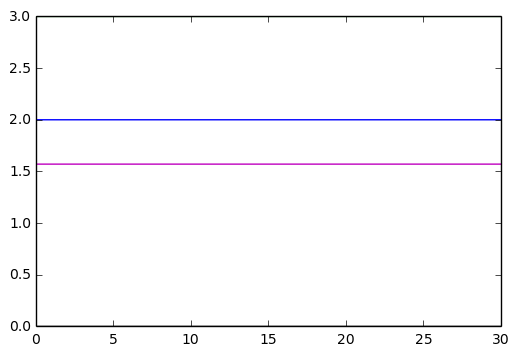

In [34]:
print np.shape(x_)
print np.shape(t_)
plt.plot(t_, x_[:,:,0])
plt.show()

Now let's try with our second initial condition

In [30]:
x = x_02
t_,x_ = sim(f,t,x, dt =1e-4)

And plot the results

(300001, 5, 1)
(300001,)


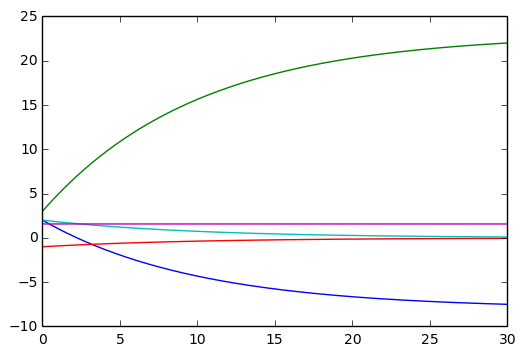

In [31]:
print np.shape(x_)
print np.shape(t_)
plt.plot(t_, x_[:,:,0])
plt.show()


e. Discuss the physical interpretation of the behavior observed in the plots.  

The plot of the states at equilibrium shows that the states remain the same for the duration of the simulation, which means that the ship is not moving anywhere. This is to be expected: if the ship is not moving anywhere, it will stay where it is.

f. Discuss the qualitative behavior of the trajectories you simulated; are the trajectories converging, diverging, or doing something else that's interesting?

The simulated trajectories are converging.